In [1]:
print("Hello World!")

Hello World!


In [2]:
import numpy as np
 
# function to print Checkerboard pattern
def printcheckerboard(n):
    print("Checkerboard pattern:")
 
    # create a n * n matrix
    x = np.zeros((n, n), dtype=int)
 
    # fill with 1 the alternate cells in rows and columns
    x[1::2, ::2] = 1
    x[::2, 1::2] = 1
 
    # print the pattern
    for i in range(n):
        for j in range(n):
            print(x[i][j], end=" ")
        print()
 
n = 8
printcheckerboard(n)

Checkerboard pattern:
0 1 0 1 0 1 0 1 
1 0 1 0 1 0 1 0 
0 1 0 1 0 1 0 1 
1 0 1 0 1 0 1 0 
0 1 0 1 0 1 0 1 
1 0 1 0 1 0 1 0 
0 1 0 1 0 1 0 1 
1 0 1 0 1 0 1 0 


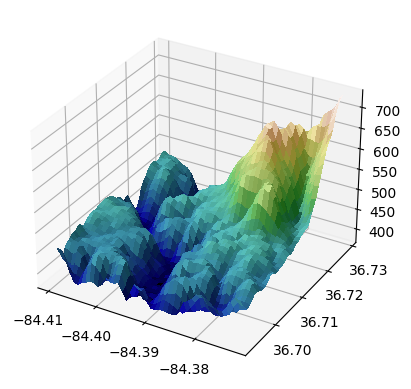

In [3]:
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

# Load and format data
dem = cbook.get_sample_data('jacksboro_fault_dem.npz', np_load=True)
z = dem['elevation']
nrows, ncols = z.shape
x = np.linspace(dem['xmin'], dem['xmax'], ncols)
y = np.linspace(dem['ymin'], dem['ymax'], nrows)
x, y = np.meshgrid(x, y)

region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]

# Set up plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)

plt.show()

2023-09-15 15:22:53.780465: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-15 15:22:53.842041: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-15 15:22:53.842893: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-15 15:22:54.612681: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


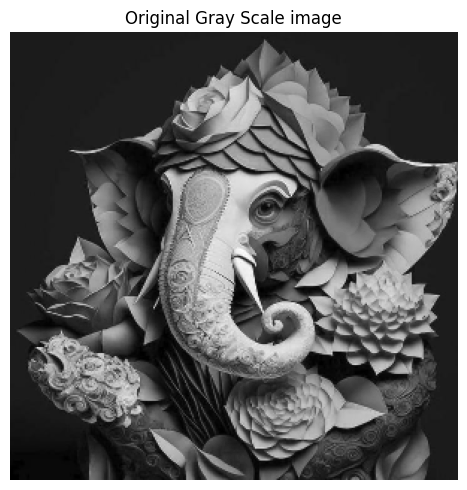

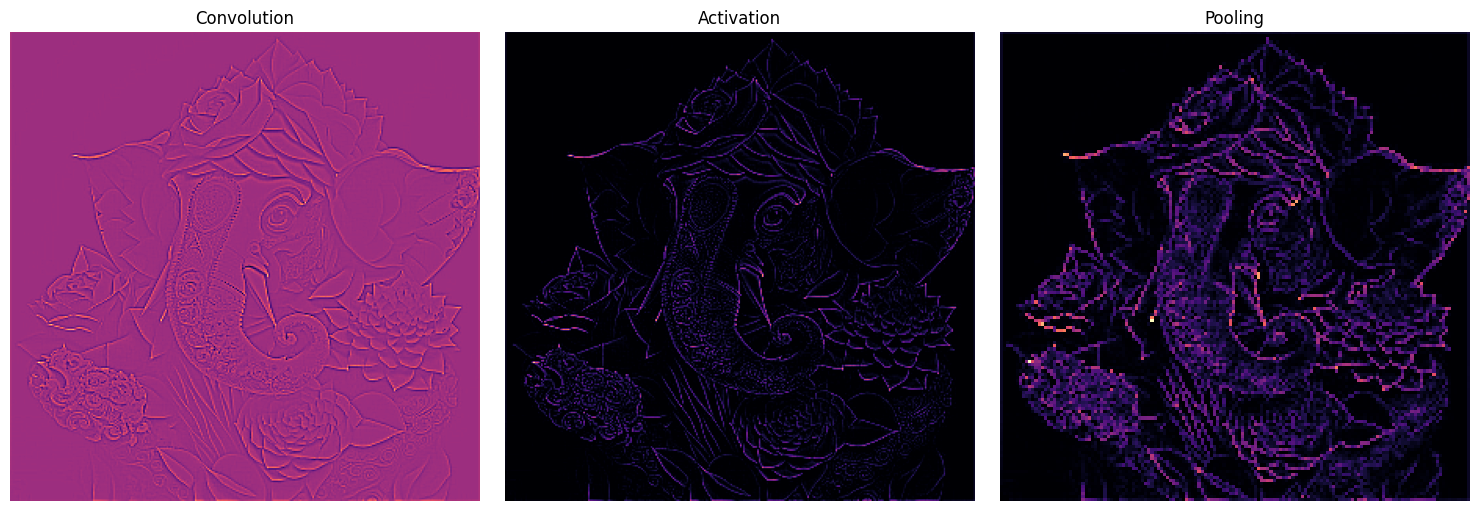

In [4]:
# import the necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

# set the param
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# define the kernel
kernel = tf.constant([[-1, -1, -1],
					[-1, 8, -1],
					[-1, -1, -1],
				])

# load the image
image = tf.io.read_file('./images/Ganesh.jpg')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300, 300])

# plot the image
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show();


# Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# convolution layer
conv_fn = tf.nn.conv2d

image_filter = conv_fn(
	input=image,
	filters=kernel,
	strides=1, # or (1, 1)
	padding='SAME',
)

plt.figure(figsize=(15, 5))

# Plot the convolved image
plt.subplot(1, 3, 1)

plt.imshow(
	tf.squeeze(image_filter)
)
plt.axis('off')
plt.title('Convolution')

# activation layer
relu_fn = tf.nn.relu
# Image detection
image_detect = relu_fn(image_filter)

plt.subplot(1, 3, 2)
plt.imshow(
	# Reformat for plotting
	tf.squeeze(image_detect)
)

plt.axis('off')
plt.title('Activation')

# Pooling layer
pool = tf.nn.pool
image_condense = pool(input=image_detect,
							window_shape=(2, 2),
							pooling_type='MAX',
							strides=(2, 2),
							padding='SAME',
							)

plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()
